<a href="https://colab.research.google.com/github/DeryaOkulda2012/VA_Analysis/blob/mpayich-patch-1/Final_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import dependencies**


In [94]:
from pathlib import Path
import pandas as pd
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# **preprocess the data**

In [ ]:
# get the  data from database


In [96]:
#get data
data = 'https://raw.githubusercontent.com/DeryaOkulda2012/VA_Analysis/main/Data/final_data.csv'
VA_df = pd.read_csv(data)
VA_df.head()

,state_name,city,county,yr,bptw_yr,ojs_yr,swo_yr,rmoaagptw_yr,ipm_yr,opm_yr,npcacw30dfpd_yr,nscacw30dfpd_yr,nmhacw30dfpd_yr,eff_yr,medical_expenditures,unique_patients
0,New York,Albany,Albany,FY15,52.12375,3.471500,3.256500,3.482000,91.86075,91.793750,97.995500,97.322250,99.371250,95.099,77737,4632
1,New York,Albany,Albany,FY16,53.11475,3.574000,3.233500,3.490250,74.49000,89.781750,93.860250,93.930750,97.681000,96.493,69628,4573
2,New York,Albany,Albany,FY17,55.08825,3.682250,3.351000,3.516000,47.55850,87.859125,84.475000,87.397250,93.690250,96.642,76544,4583
3,New York,Albany,Albany,FY18,62.35150,3.781500,3.539000,3.715500,49.35400,84.828875,79.099750,81.834250,88.354000,97.180,70034,4366
4,New York,Albany,Albany,FY19,68.35200,3.853667,3.697667,3.909333,65.52900,85.471000,80.215333,80.543667,90.426333,97.006,73634,4310


In [97]:
VA_df.describe()

,bptw_yr,ojs_yr,swo_yr,rmoaagptw_yr,ipm_yr,opm_yr,npcacw30dfpd_yr,nscacw30dfpd_yr,nmhacw30dfpd_yr,eff_yr,medical_expenditures,unique_patients
count,723.000000,723.000000,723.000000,723.000000,659.000000,723.000000,723.000000,723.000000,723.000000,723.000000,7.230000e+02,723.000000
mean,62.096901,3.740288,3.523010,3.736406,83.716838,86.067294,87.239481,84.163073,95.356142,93.209013,1.994148e+05,13415.802213
std,5.766353,0.129956,0.186826,0.165245,9.222389,2.573307,11.805730,9.617982,4.296784,3.231349,2.078832e+05,14466.867565
min,43.519500,3.318750,2.887500,3.199500,47.214500,78.752625,40.011250,59.401000,75.614000,72.183000,3.584000e+03,687.000000
25%,58.652125,3.655625,3.402667,3.634125,78.039208,84.291854,80.405125,76.402833,92.909833,92.053375,7.542800e+04,4755.500000
50%,62.442500,3.749000,3.539000,3.741500,85.297000,86.072000,90.830750,85.348333,96.697000,93.985000,1.392630e+05,8369.000000
75%,65.859250,3.829500,3.645000,3.849750,91.010167,87.940562,96.713417,92.305375,98.711000,95.311375,2.467925e+05,15701.000000
max,78.230667,4.077000,4.073000,4.240333,99.238000,93.180250,99.992500,99.882000,100.000000,98.146000,1.353994e+06,75905.000000


In [98]:
# examine the proportion of missing values in the dataset:
VA_df.isnull().sum().sort_values(ascending=False)/VA_df.shape[0]

ipm_yr                  0.08852
state_name              0.00000
city                    0.00000
county                  0.00000
yr                      0.00000
bptw_yr                 0.00000
ojs_yr                  0.00000
swo_yr                  0.00000
rmoaagptw_yr            0.00000
opm_yr                  0.00000
npcacw30dfpd_yr         0.00000
nscacw30dfpd_yr         0.00000
nmhacw30dfpd_yr         0.00000
eff_yr                  0.00000
medical_expenditures    0.00000
unique_patients         0.00000
dtype: float64

In [99]:
#Instantiate SimpleImputer 
si=SimpleImputer(missing_values = np.nan, strategy="mean")
si.fit(VA_df[['ipm_yr']])
  
#Filling missing data with median
VA_df[['ipm_yr']] = si.transform(VA_df[['ipm_yr']])

In [100]:
# Generate our categorical variable list
VA_cat = VA_df.dtypes[VA_df.dtypes == "object"].index.tolist()

In [101]:
# Check the number of unique values in each column
VA_df[VA_cat].nunique()

state_name     52
city          145
county        143
yr              5
dtype: int64

In [102]:
# Print out the city value counts
city_counts = VA_df.city.value_counts()
city_counts

Albany             5
Lebanon            5
Nashville          5
New Orleans        5
New York           5
                  ..
Fayetteville AR    5
Fayetteville NC    5
Fort Meade         5
Fort Wayne         5
Wilmington         3
Name: city, Length: 145, dtype: int64

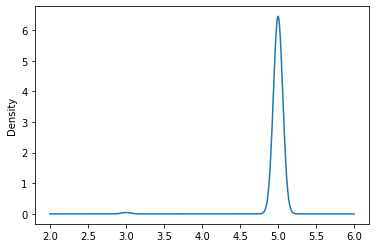

In [103]:
# Visualize the value counts
city_counts.plot.density()

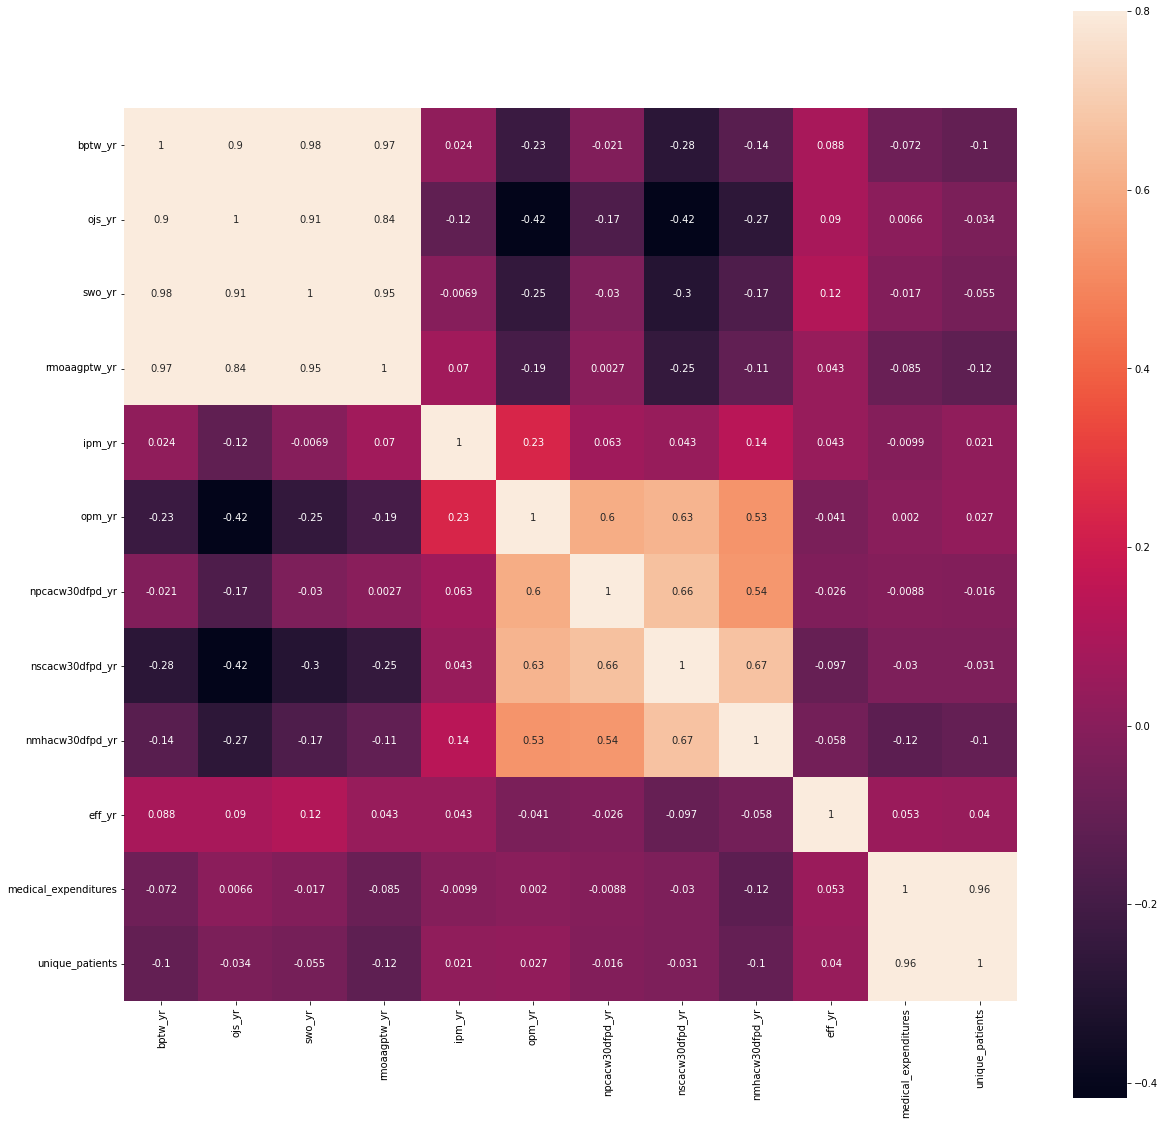

In [104]:
# plot the correlation between features
C_mat = VA_df.corr()
fig = plt.figure(figsize = (20,20))

sb.heatmap(C_mat, vmax = .8, square = True, annot = True)
plt.show()

In [105]:
#One Hot Encode The Categorical Features :

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(VA_df[VA_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(VA_cat)
encode_df.head()

,state_name_Alabama,state_name_Alaska,state_name_Arizona,state_name_Arkansas,state_name_California,state_name_Colorado,state_name_Connecticut,state_name_Delaware,state_name_District of Columbia,state_name_Florida,...,"county_Wayne, WV",county_Westchester,county_Williamson,county_Windsor,county_Yavapai,yr_FY15,yr_FY16,yr_FY17,yr_FY18,yr_FY19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
# Merge one-hot encoded features and drop the originals
VA_df = VA_df.merge(encode_df,left_index=True, right_index=True)
VA_df = VA_df.drop(VA_cat,1)
VA_df.head()

,bptw_yr,ojs_yr,swo_yr,rmoaagptw_yr,ipm_yr,opm_yr,npcacw30dfpd_yr,nscacw30dfpd_yr,nmhacw30dfpd_yr,eff_yr,...,"county_Wayne, WV",county_Westchester,county_Williamson,county_Windsor,county_Yavapai,yr_FY15,yr_FY16,yr_FY17,yr_FY18,yr_FY19
0,52.12375,3.471500,3.256500,3.482000,91.86075,91.793750,97.995500,97.322250,99.371250,95.099,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,53.11475,3.574000,3.233500,3.490250,74.49000,89.781750,93.860250,93.930750,97.681000,96.493,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,55.08825,3.682250,3.351000,3.516000,47.55850,87.859125,84.475000,87.397250,93.690250,96.642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,62.35150,3.781500,3.539000,3.715500,49.35400,84.828875,79.099750,81.834250,88.354000,97.180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,68.35200,3.853667,3.697667,3.909333,65.52900,85.471000,80.215333,80.543667,90.426333,97.006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Standardize the data**

In [107]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Define Features and Target**

In [143]:
# Split our preprocessed data into our features and target arrays
X = VA_df.drop('eff_yr', axis = 1)
y = VA_df['eff_yr']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=78)

**XGBRegressor model**

In [144]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train,verbose=False)

[03:00:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [145]:
score = XGBModel.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.6578989569914413


In [146]:
scores = cross_val_score(XGBModel, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

[03:00:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [147]:
y_pred = XGBModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)

MSE: 6.41


In [148]:
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 2.53


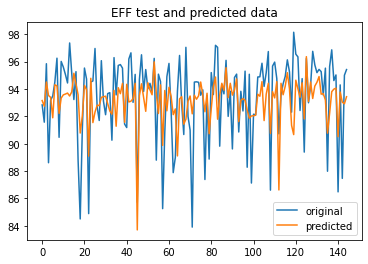

In [149]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("EFF test and predicted data")
plt.legend()
plt.show()

In [150]:
prediction_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
prediction_df

,Actual,Predicted
20,92.83700,93.154739
186,91.57500,92.741798
487,95.84600,94.509445
125,88.61225,93.523132
544,93.17700,93.393188
...,...,...
548,86.48300,90.513626
167,94.29900,93.772156
120,87.46900,93.033951
583,95.00500,92.917557


In [151]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/predictions.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  prediction_df.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
